Trying to improve the tensorFlow model
--

In [8]:
import tensorflow as tf
import numpy as np
import pandas as pd

In [2]:
def normalize(data):
    max_data = np.max(data, axis=0)
    min_data = np.min(data, axis=0)
    stats = ['away_wins', 'away_losses', 'away_ot',
             'away_pts', 'away_ptPctg', 'away_goalsPerGame',
             'away_goalsAgainstPerGame', 'away_evGGARatio',
             'away_powerPlayPercentage', 'away_powerPlayGoals',
             'away_powerPlayGoalsAgainst', 'away_powerPlayOpportunities',
             'away_penaltyKillPercentage', 'away_shotsPerGame', 'away_shotsAllowed',
             'away_winScoreFirst', 'away_winOppScoreFirst', 'away_winLeadFirstPer',
             'away_winLeadSecondPer', 'away_winOutshootOpp', 'away_winOutshotByOpp',
             'away_faceOffsTaken', 'away_faceOffsWon', 'away_faceOffsLost',
             'away_faceOffWinPercentage', 'away_shootingPctg', 'away_savePctg',
             'home_wins', 'home_losses', 'home_ot', 'home_pts', 'home_ptPctg',
             'home_goalsPerGame', 'home_goalsAgainstPerGame', 'home_evGGARatio',
             'home_powerPlayPercentage', 'home_powerPlayGoals',
             'home_powerPlayGoalsAgainst', 'home_powerPlayOpportunities',
             'home_penaltyKillPercentage', 'home_shotsPerGame', 'home_shotsAllowed',
             'home_winScoreFirst', 'home_winOppScoreFirst', 'home_winLeadFirstPer',
             'home_winLeadSecondPer', 'home_winOutshootOpp', 'home_winOutshotByOpp',
             'home_faceOffsTaken', 'home_faceOffsWon', 'home_faceOffsLost',
             'home_faceOffWinPercentage', 'home_shootingPctg', 'home_savePctg']
    for stat in stats:
        data[stat] = (data[stat] - min_data[stat])/(max_data[stat] - min_data[stat])
    return data

In [3]:
def prepare(data):
    X = data.iloc[:,3:].values
    # we insert an all-ones column at index 0
    X = np.insert(X, 0, 1, axis=1)
    # get the first column of the data
    y = data.iloc[:,0:1].values
    return X,y

In [4]:
def split_train_test(X,y,pct=80):
    n = X.shape[0]
    s = round(n * pct / 100)
    
    indices = np.random.permutation(n)
    train_idx, test_idx = indices[:s], indices[s:]
    
    X_train, X_test = X[train_idx,:], X[test_idx,:]
    y_train, y_test = y[train_idx,:], y[test_idx,:]
    
    return X_train, y_train, X_test, y_test

In [32]:
data_2000_2001 = pd.read_csv('game_data/game_data_2000_2001.csv', header=0)
data_2001_2002 = pd.read_csv('game_data/game_data_2001_2002.csv', header=0)
data_2002_2003 = pd.read_csv('game_data/game_data_2002_2003.csv', header=0)
data_2003_2004 = pd.read_csv('game_data/game_data_2003_2004.csv', header=0)
data_2005_2006 = pd.read_csv('game_data/game_data_2005_2006.csv', header=0)
data_2006_2007 = pd.read_csv('game_data/game_data_2006_2007.csv', header=0)
data_2007_2008 = pd.read_csv('game_data/game_data_2007_2008.csv', header=0)
data_2008_2009 = pd.read_csv('game_data/game_data_2008_2009.csv', header=0)
data_2009_2010 = pd.read_csv('game_data/game_data_2009_2010.csv', header=0)
data_2010_2011 = pd.read_csv('game_data/game_data_2010_2011.csv', header=0)
data_2011_2012 = pd.read_csv('game_data/game_data_2011_2012.csv', header=0)
data_2012_2013 = pd.read_csv('game_data/game_data_2012_2013.csv', header=0)
data_2013_2014 = pd.read_csv('game_data/game_data_2013_2014.csv', header=0)
data_2014_2015 = pd.read_csv('game_data/game_data_2014_2015.csv', header=0)
data_2015_2016 = pd.read_csv('game_data/game_data_2015_2016.csv', header=0)
data_2016_2017 = pd.read_csv('game_data/game_data_2016_2017.csv', header=0)
data_2017_2018 = pd.read_csv('game_data/game_data_2017_2018.csv', header=0)

#each one of these data sets needs to be normalized 
# data_2000_2001 = normalize(data_2000_2001)
# data_2001_2002 = normalize(data_2001_2002)
# data_2002_2003 = normalize(data_2002_2003)
# data_2003_2004 = normalize(data_2003_2004)
# data_2005_2006 = normalize(data_2005_2006)
# data_2006_2007 = normalize(data_2006_2007)
# data_2007_2008 = normalize(data_2007_2008)
# data_2008_2009 = normalize(data_2008_2009)
# data_2009_2010 = normalize(data_2009_2010)
# data_2010_2011 = normalize(data_2010_2011)
# data_2011_2012 = normalize(data_2011_2012)
# data_2012_2013 = normalize(data_2012_2013)
# data_2013_2014 = normalize(data_2013_2014)
# data_2014_2015 = normalize(data_2014_2015)
# data_2016_2017 = normalize(data_2016_2017)
# data_2017_2018 = normalize(data_2017_2018)

frames = [data_2000_2001, data_2001_2002, data_2002_2003, data_2003_2004, data_2005_2006, 
          data_2006_2007, data_2007_2008, data_2008_2009, data_2009_2010, data_2010_2011, 
          data_2011_2012, data_2012_2013, data_2013_2014, data_2014_2015, data_2015_2016, 
          data_2016_2017, data_2017_2018]
data = pd.concat(frames)

# X,y = prepare(data)
# print(X, y)
# train_data,train_labels,test_data,test_labels = split_train_test(X,y,pct=80)

In [104]:
print("Training set: {}".format(train_data.shape))  # 17698 examples, 55 features
print("Testing set:  {}".format(test_data.shape))   # 4424 examples, 55 features

Training set: (17698, 54)
Testing set:  (4424, 54)


In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib as mpl
import numpy as np
import seaborn as sns
%matplotlib inline

In [7]:
data.columns

Index(['winner', 'awayID', 'homeID', 'away_wins', 'away_losses', 'away_ot',
       'away_pts', 'away_ptPctg', 'away_goalsPerGame',
       'away_goalsAgainstPerGame', 'away_evGGARatio',
       'away_powerPlayPercentage', 'away_powerPlayGoals',
       'away_powerPlayGoalsAgainst', 'away_powerPlayOpportunities',
       'away_penaltyKillPercentage', 'away_shotsPerGame', 'away_shotsAllowed',
       'away_winScoreFirst', 'away_winOppScoreFirst', 'away_winLeadFirstPer',
       'away_winLeadSecondPer', 'away_winOutshootOpp', 'away_winOutshotByOpp',
       'away_faceOffsTaken', 'away_faceOffsWon', 'away_faceOffsLost',
       'away_faceOffWinPercentage', 'away_shootingPctg', 'away_savePctg',
       'home_wins', 'home_losses', 'home_ot', 'home_pts', 'home_ptPctg',
       'home_goalsPerGame', 'home_goalsAgainstPerGame', 'home_evGGARatio',
       'home_powerPlayPercentage', 'home_powerPlayGoals',
       'home_powerPlayGoalsAgainst', 'home_powerPlayOpportunities',
       'home_penaltyKillPercentage'

In [33]:
data = data.drop(['away_wins', 'away_losses', 'away_ot',
       'away_pts', 'away_ptPctg', 'away_powerPlayGoals',
       'away_powerPlayGoalsAgainst', 'away_powerPlayOpportunities','away_shotsPerGame', 'away_shotsAllowed',
       'away_winScoreFirst', 'away_winOppScoreFirst', 'away_winLeadFirstPer',
       'away_winLeadSecondPer', 'away_winOutshootOpp', 'away_winOutshotByOpp',
       'away_faceOffsTaken', 'away_faceOffsWon', 'away_faceOffsLost',
       'away_faceOffWinPercentage',
       'home_wins', 'home_losses', 'home_ot',
       'home_pts', 'home_ptPctg', 'home_powerPlayGoals',
       'home_powerPlayGoalsAgainst', 'home_powerPlayOpportunities','home_shotsPerGame', 'home_shotsAllowed',
       'home_winScoreFirst', 'home_winOppScoreFirst', 'home_winLeadFirstPer',
       'home_winLeadSecondPer', 'home_winOutshootOpp', 'home_winOutshotByOpp',
       'home_faceOffsTaken', 'home_faceOffsWon', 'home_faceOffsLost',
       'home_faceOffWinPercentage'], axis=1)

In [45]:
max(data.away_shootingPctg)

12.300000000000001

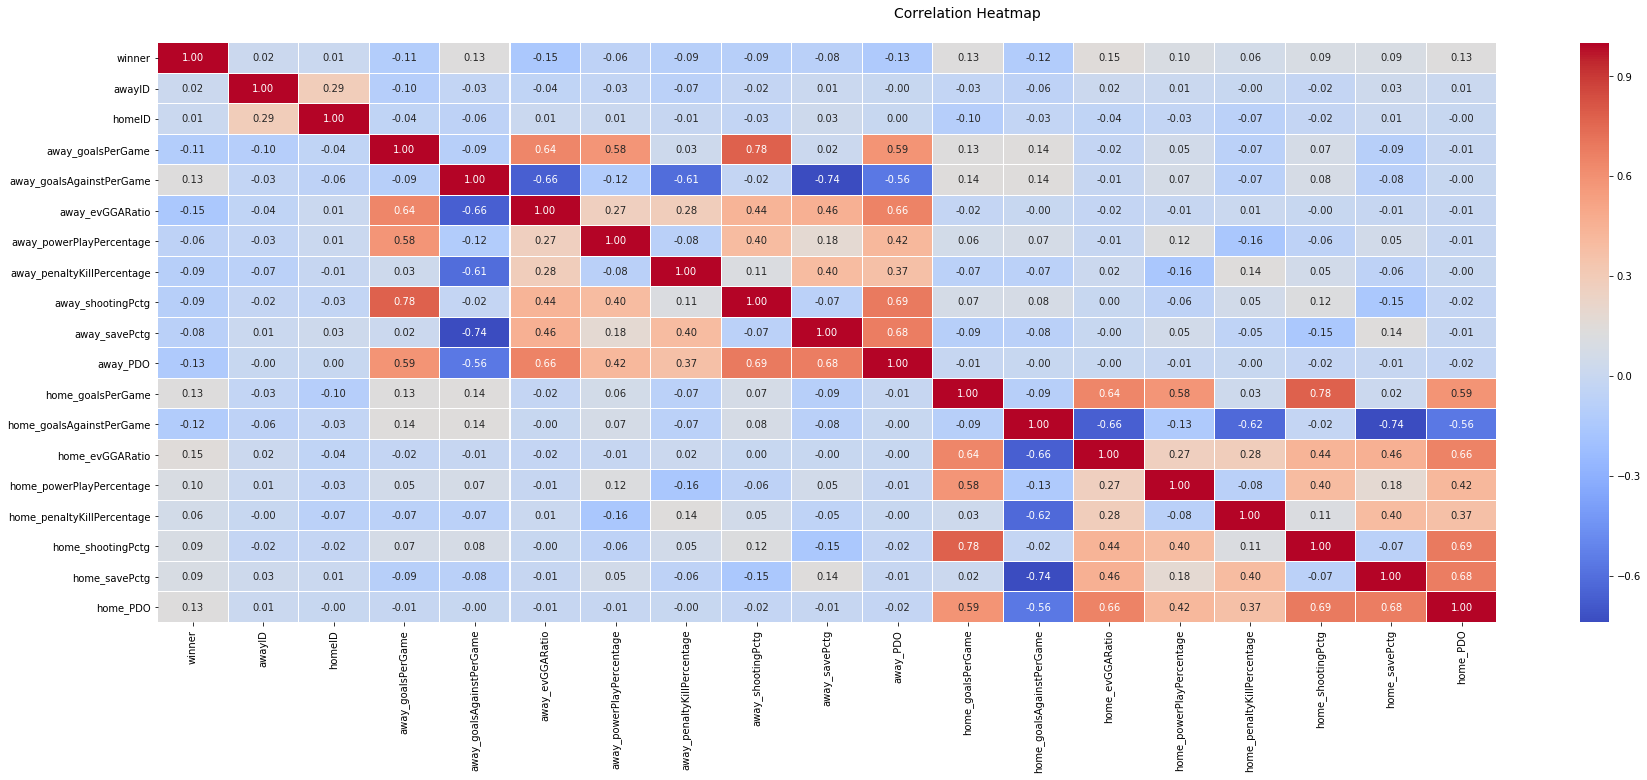

In [34]:
# Correlation Matrix Heatmap
f, ax = plt.subplots(figsize=(30, 10))
corr = data.corr()
hm = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f',
                 linewidths=.05)
f.subplots_adjust(top=0.93)
t= f.suptitle('Correlation Heatmap', fontsize=14)

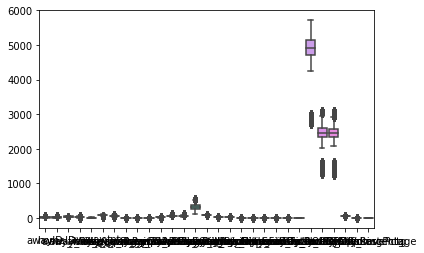

In [32]:
sns.boxplot(data=data)

plt.show()

In [36]:
data_dropped = data.drop(['away_faceOffsTaken', 'away_faceOffsWon', 'away_faceOffsLost',], axis=1)

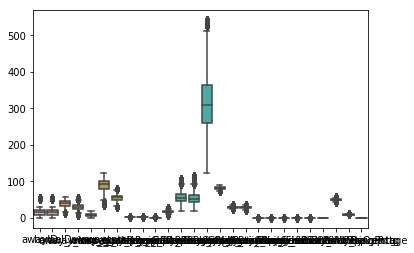

In [37]:
sns.boxplot(data=data_dropped)

plt.show()

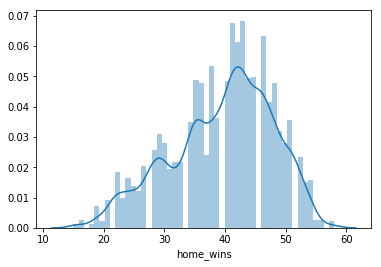

In [39]:
sns.distplot(data.home_wins)

plt.show()

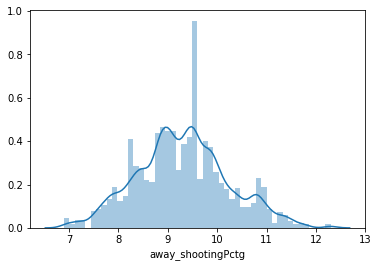

In [43]:
sns.distplot(data.away_shootingPctg)

plt.show()

In [ ]:
# Pair-wise Scatter Plots
cols = ['winner', 'away_wins', 'away_losses', 'away_ot',
       'away_pts', 'away_ptPctg', 'away_goalsPerGame',]
pp = sns.pairplot(data[cols], size=1.8, aspect=1.8,
                  plot_kws=dict(edgecolor="k", linewidth=0.5),
                  diag_kind="kde", diag_kws=dict(shade=True))

fig = pp.fig 
fig.subplots_adjust(top=0.93, wspace=0.3)
t = fig.suptitle('Pairwise Plots', fontsize=14)